## Kmeans

- 必须要指定划分数k
- k可通过SSE和轮廓系数确定
- 由于采用欧氏距离，有量纲的数据一定要标准化！！

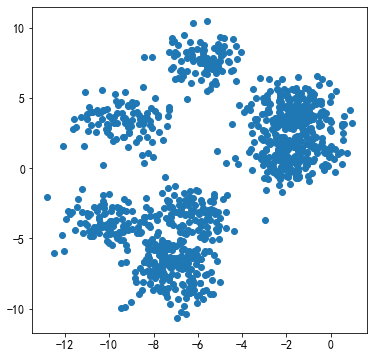

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.rcParams['axes.unicode_minus'] = False 

seed = 1
X, _ = make_blobs(n_samples=1000, centers=10, n_features=2, random_state=seed)
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:, 0], X[:, 1])
plt.show()

## $\bigstar$ sklearn.cluster.KMeans（kmeans++）

- init{‘k-means++’, ‘random’}： 初始化方法，默认使用KMeans++算法

---

优点：
- 简单快速

缺点：
- 需要事先给出生成簇的数目
- 对初值敏感，容易陷入局部极小值，需要多试几次
- 对孤立点敏感

[[-1.68159346  2.52342913]
 [-7.64783023 -5.30727773]
 [-5.63682713  7.62029892]
 [-9.38942258  3.27849591]]
------------------------------
(array([0, 1, 2, 3]), array([396, 398, 104, 102], dtype=int64))
------------------------------
5282.21632973776


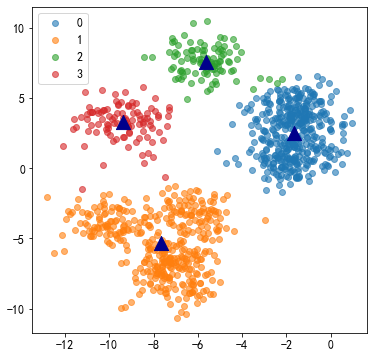

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

seed = 1
X, _ = make_blobs(n_samples=1000, centers=10, n_features=2, random_state=seed)

mod = KMeans(n_clusters=4, random_state=seed, init='k-means++').fit(X)
print(mod.cluster_centers_) # 聚类中心
print('-'*30)
# print(mod.labels_) # 划分
print(np.unique(mod.labels_, return_counts=True)) # 统计每个聚类的点数
print('-'*30)
print(mod.inertia_) # SSE

res = np.column_stack([X, mod.labels_])

fig, ax = plt.subplots(figsize=(6, 6))
for j in range(mod.n_clusters):
    ind = res[:, 2] == j
    ax.scatter(res[ind, 0], res[ind, 1], label=j, alpha=0.6)
    ax.scatter(mod.cluster_centers_[j, 0], mod.cluster_centers_[j, 1], color='darkblue', marker='^', s=200)
ax.legend(loc='best')
plt.show()

## sklearn.cluster.BisectingKMeans（限python3.10）

- 全局最优算法，精确度更高

- bisecting_strategy{“biggest_inertia”, “largest_cluster”}, default=”biggest_inertia”： 两种策略拆分聚类，前者精度更高，后者更快
- init{‘k-means++’, ‘random’}： 初始化方法，默认使用random算法

---

- bi-kmeans是针对kmeans算法会陷入局部最优的缺陷进行的改进算法。
- 该算法基于SSE最小化的原理，首先将所有的数据点视为一个簇，然后将该簇一分为二，之后选择其中一个簇继续进行划分，选择哪一个簇进行划分取决于对其划分是否能最大程度的降低SSE的值。

[[-1.69584742  2.56909643]
 [-7.5343532   5.61145225]
 [-7.01265374 -7.09024246]
 [-8.33632576 -3.41260264]]
------------------------------
(array([0, 1, 2, 3]), array([401, 195, 199, 205], dtype=int64))
------------------------------
5411.653379495881


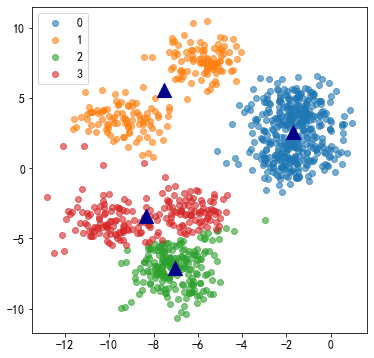

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import BisectingKMeans

seed = 1
X, _ = make_blobs(n_samples=1000, centers=10, n_features=2, random_state=seed)

mod = BisectingKMeans(n_clusters=4, random_state=seed, init='k-means++', bisecting_strategy='biggest_inertia').fit(X) # 按最大SSE拆分
print(mod.cluster_centers_) # 聚类中心
print('-'*30)
print(np.unique(mod.labels_, return_counts=True)) # 统计每个聚类的点数
print('-'*30)
print(mod.inertia_) # SSE

res = np.column_stack([X, mod.labels_])

fig, ax = plt.subplots(figsize=(6, 6))
for j in range(mod.n_clusters):
    ind = res[:, 2] == j
    ax.scatter(res[ind, 0], res[ind, 1], label=j, alpha=0.6)
    ax.scatter(mod.cluster_centers_[j, 0], mod.cluster_centers_[j, 1], color='darkblue', marker='^', s=200)
ax.legend(loc='best')
plt.show()

[[-1.69584742  2.56909643]
 [-7.5343532   5.61145225]
 [-7.01265374 -7.09024246]
 [-8.33632576 -3.41260264]]
------------------------------
(array([0, 1, 2, 3]), array([401, 195, 199, 205], dtype=int64))
------------------------------
5411.653379495881


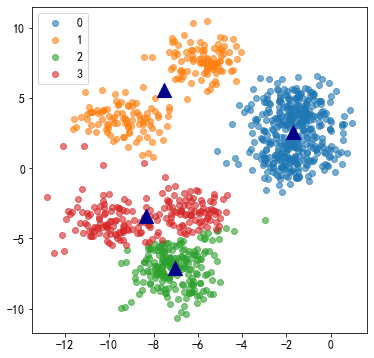

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import BisectingKMeans

seed = 1
X, _ = make_blobs(n_samples=1000, centers=10, n_features=2, random_state=seed)

mod = BisectingKMeans(n_clusters=4, random_state=seed, init='k-means++', bisecting_strategy='largest_cluster').fit(X) # 按最多点数拆分
print(mod.cluster_centers_) # 聚类中心
print('-'*30)
print(np.unique(mod.labels_, return_counts=True)) # 统计每个聚类的点数
print('-'*30)
print(mod.inertia_) # SSE

res = np.column_stack([X, mod.labels_])

fig, ax = plt.subplots(figsize=(6, 6))
for j in range(mod.n_clusters):
    ind = res[:, 2] == j
    ax.scatter(res[ind, 0], res[ind, 1], label=j, alpha=0.6)
    ax.scatter(mod.cluster_centers_[j, 0], mod.cluster_centers_[j, 1], color='darkblue', marker='^', s=200)
ax.legend(loc='best')
plt.show()

## 最佳系数k的确定--SSE拐点法

- SSE簇内总离差平方和 ： 越小越好

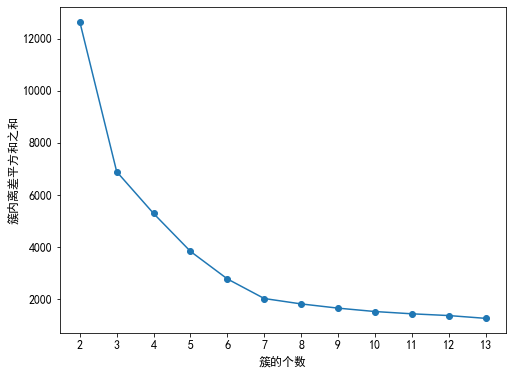

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

seed = 1
X, _ = make_blobs(n_samples=1000, centers=10, n_features=2, random_state=seed)

K = 13
SSE =  []
for k in range(2, K+1):
    mod = KMeans(n_clusters=k, random_state=seed, init='k-means++').fit(X)
    SSE.append(mod.inertia_)

plt.rc('font', family='SimHei', size=12)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(2, K+1), SSE, '-o')
ax.set_xlabel('簇的个数')
ax.set_ylabel('簇内离差平方和之和')
ax.set_xticks(np.arange(2, K+1))
plt.show()
# k=7

## 最佳系数k的确定--轮廓系数法

- 总轮廓系数<0：效果不好
- 总轮廓系数~1：效果好

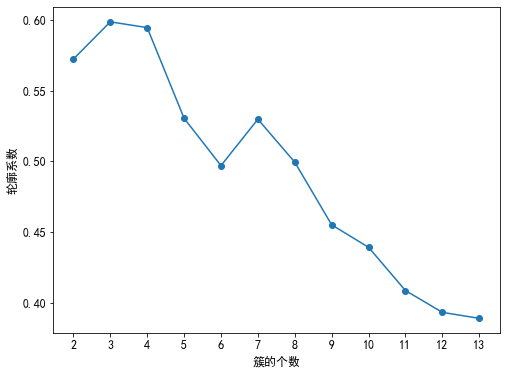

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

seed = 1
X, _ = make_blobs(n_samples=1000, centers=10, n_features=2, random_state=seed)

K = 13
S =  []
for k in range(2, K+1):
    mod = KMeans(n_clusters=k, random_state=seed, init='k-means++').fit(X)
    S.append(silhouette_score(X, mod.labels_, metric='euclidean')) # 求轮廓系数

plt.rc('font', family='SimHei', size=12)
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(2, K+1), S, '-o')
ax.set_xlabel('簇的个数')
ax.set_ylabel('轮廓系数')
ax.set_xticks(np.arange(2, K+1))
plt.show()
# k=3